In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import mne

import os

# load the data

You need to change the file type to txt by appending '.txt' to the '.wl1' files.

In [11]:
path = os.getcwd() + "/2025-01-28-Group1/"
files = os.listdir(path)
print(files)

['.DS_Store', '2025-01-28_006', '2025-01-28_001', '2025-01-28_008', '2025-01-28_009', '2025-01-28_007', '2025-01-28_002', '2025-01-28_005', '2025-01-28_004', '2025-01-28_003']


In [70]:
# try the first file
sub_path = '2025-01-28_001'
data_path = path + sub_path

filename1 = os.path.join(data_path, sub_path + '.wl1.txt')
filename2 = os.path.join(data_path, sub_path + '.wl2.txt')

print(filename1)
print(filename2)

/Users/adamsmith/Desktop/ACADEMICS/YORKU/taships/Tutoring/tutoring/Salman/2025-01-28-Group1/2025-01-28_001/2025-01-28_001.wl1.txt
/Users/adamsmith/Desktop/ACADEMICS/YORKU/taships/Tutoring/tutoring/Salman/2025-01-28-Group1/2025-01-28_001/2025-01-28_001.wl2.txt


In [72]:
# import text file 
data1 = pd.read_csv(filename1, sep=r'\s+', header=None)
data2 = pd.read_csv(filename2, sep=r'\s+', header=None)
# print(data1)
print(data2)

          0         1         2         3         4         5         6   \
0   0.035096  0.010170  0.035766  0.026234  0.017958  0.097040  0.006404   
1   0.035052  0.010129  0.035719  0.026219  0.017912  0.097036  0.006366   
2   0.035234  0.010161  0.035814  0.026412  0.018108  0.097806  0.006383   
3   0.035401  0.010201  0.035951  0.026559  0.018181  0.098367  0.006400   
4   0.034696  0.010089  0.035430  0.025786  0.017623  0.095271  0.006288   
5   0.034560  0.010056  0.035262  0.025762  0.017606  0.095334  0.006287   
6   0.034619  0.010065  0.035255  0.025835  0.017652  0.095759  0.006284   
7   0.034611  0.010040  0.035265  0.025920  0.017727  0.095943  0.006272   
8   0.034872  0.010057  0.035402  0.026163  0.017903  0.096718  0.006299   
9   0.034890  0.010058  0.035440  0.026102  0.017854  0.096694  0.006268   
10  0.034209  0.009974  0.034919  0.025452  0.017412  0.094137  0.006187   
11  0.034136  0.009936  0.034811  0.025433  0.017399  0.094322  0.006170   
12  0.034174

In [47]:
# accessing rows
print(data.loc[0])

# multiple rows
# print(data.loc[[1,2,4]])

# slicing 
# print(data.loc[0:5])

0     0.018647
1     0.004927
2     0.017979
3     0.014473
4     0.009549
5     0.077201
6     0.002554
7     0.001401
8     0.006188
9     0.044977
10    0.009310
11    0.003225
12    0.009696
13    0.028031
14    0.004740
15    0.035267
16    0.003610
17    0.001931
18    0.011020
19    0.042993
Name: 0, dtype: float64


In [49]:
# accessing columns
print(data[0])

# or 
# print(data.loc[:,0])

# accessing multiple columns
# print(data.loc[:,[0,1]])

# slicing 
# print(data.loc[:,0:5])

0     0.018647
1     0.018638
2     0.018668
3     0.018744
4     0.018521
5     0.018479
6     0.018518
7     0.018513
8     0.018609
9     0.018627
10    0.018401
11    0.018362
12    0.018436
13    0.018446
14    0.018491
15    0.018555
16    0.018301
17    0.018270
18    0.018318
19    0.018329
20    0.018395
21    0.018435
22    0.018446
23    0.018260
24    0.018279
25    0.018300
26    0.018322
27    0.018375
28    0.018437
Name: 0, dtype: float64


# Analyse the data

In [75]:
sampling_freq = 10.2
period = 1/sampling_freq
time = np.ones(len(data))*period*np.arange(len(data))
wavelength1 = 760e-9 # in meters
wavelength2 = 850e-9 # in meters
DPF = 6.0

# tabulate extinction coefficients from https://omlc.org/spectra/hemoglobin/summary.html
eHB02_760 = 586
eHB_760 = 1548.52

eHB02_850 = 1058
eHB_850 = 691.32

d = 1 #?

# add time to the dataframe 
data1['time'] = time
data2['time'] = time

In [76]:
# new dataframs with time and specific channel 
data1 = data1[[0, 'time']]
data2 = data2[[0, 'time']]

In [83]:
A1[5]

np.float64(-0.0006339419125391478)

In [87]:
# set up for system of equations in matrix form 
epsilon_M = np.array([[eHB02_760, eHB_760], [eHB02_850, eHB_850]])
A1 = -np.log10(data1[0]/np.mean(data1[0]))
A2 = -np.log10(data2[0]/np.mean(data2[0]))
A = np.array([A1, A2])

# solve the system of equations 
d = 1
DPF = 6.0

# dlelta_C = A / epsilon_M * d * DPF
epsilon_const = epsilon_M * d * DPF
# invert the epsilon matric 
epsilon_inv = np.linalg.inv(epsilon_const)

# solve for each time point 
concentrations = []
for i in range(len(data1)):
    time = data1['time'][i]
    A = np.array([A1[i], A2[i]])
    delta_C = np.dot(epsilon_inv, A)
    concentrations.append([time, delta_C[0], delta_C[1]])

concentrations = pd.DataFrame(concentrations, columns=['time', 'HbO2', 'Hb'])

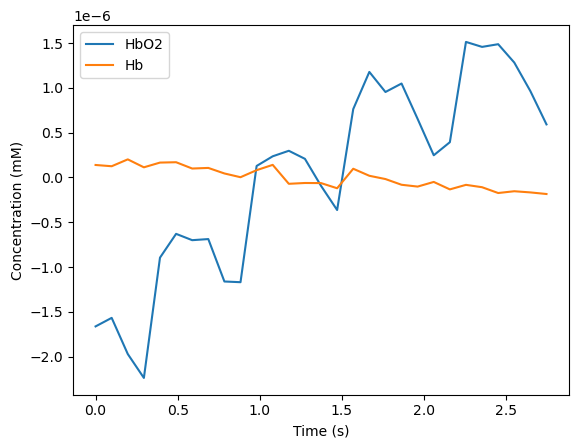

In [88]:
# plot the two concentrations as a function of time 
plt.plot(concentrations['time'], concentrations['HbO2'], label='HbO2')
plt.plot(concentrations['time'], concentrations['Hb'], label='Hb')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mM)')
plt.legend()
plt.show()

# Making a function to solve for the conetration of the chromophores

In [ ]:
def chromophore_concentrations(file_num, channel):
    # load in data 
    filename1 = path + '2025-01-28_00' + str(file_num) + '.wl1.txt'
    filename2 = path + '2025-01-28_00' + str(file_num) + '.wl2.txt'
    data1 = pd.read_csv(filename1, sep=r'\s+', header=None)
    data2 = pd.read_csv(filename2, sep=r'\s+', header=None)

    # add the time to the data 
    sampling_freq = 10.2
    period = 1/sampling_freq
    time1 = np.ones(len(data1))*period*np.arange(len(data1))
    time2 = np.ones(len(data2))*period*np.arange(len(data2))
    data1['time'] = time1
    data2['time'] = time2

    # get only 1 channel 
    data1 = data1[[channel, 'time']]
    data2 = data2[[channel, 'time']]

    # calculate optical density 
    A1 = -np.log10(data1[channel]/np.mean(data1[channel]))
    A2 = -np.log10(data2[channel]/np.mean(data2[channel]))

    # extinction coefficients
    eHB02_760, eHB_760 = 586, 1548.52
    eHB02_850, eHB_850 = 1058, 691.32
    # 2x2 matrix of extinction coefficients
    epsilon_M = np.array([[eHB02_760, eHB_760], [eHB02_850, eHB_850]])
    
    # constants 
    DPF = 6.0
    d = 1 # dont know what this should be 

    # system of equations 
    # in general deltaC = A / epsilon(lambda) * d * DPF

    # for each row in the data calculate the chromophore concentrations
    # deltaC is a 2x1 vector of chromophore concentrations
    concentations = []
    for i in range(len(data1)):
        A = np.array([A1[i], A2[i]])
        deltaC = A / epsilon_M * d * DPF
        concentations.append(deltaC)


     
    
    